Best parameters found:  {'C': 0.01, 'gamma': 0.1}


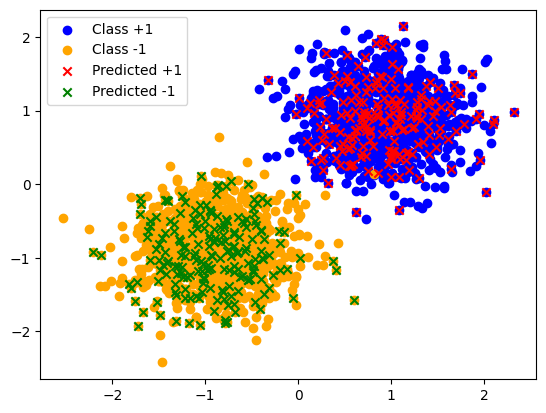

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit

# Generate random data
np.random.seed(0)

# Upper half data
upper_x = np.random.normal(3, 1.5, (1000, 2))
upper_labels = np.ones((1000, 1))  # Label as +1

# Lower half data
lower_x = np.random.normal(-3, 1.5, (1000, 2))
lower_labels = -np.ones((1000, 1))  # Label as -1

# Combine data
X = np.concatenate((upper_x, lower_x), axis=0)
y = np.concatenate((upper_labels, lower_labels), axis=0).ravel()

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for hyperparameter tuning
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = {'C': C_range, 'gamma': gamma_range}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("Best parameters found: ", grid.best_params_)

# Train the model with the best parameters
best_svc = grid.best_estimator_
best_svc.fit(X_train, y_train)

# Predict
y_pred = best_svc.predict(X_test)

# Plot results
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Class +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='orange', label='Class -1')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], c='red', label='Predicted +1', marker='x')
plt.scatter(X_test[y_pred == -1][:, 0], X_test[y_pred == -1][:, 1], c='green', label='Predicted -1', marker='x')
plt.legend()
plt.show()